In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/results.csv')
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [3]:
burk_tun = data[((data['home_team'] == 'Burkina Faso') & (data['away_team'] == 'Tunisia')) | (data['home_team'] == 'Tunisia') & (data['away_team'] == 'Burkina Faso')]

In [4]:
burk_tun

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
19303,1995-10-22,Burkina Faso,Tunisia,2.0,2.0,Friendly,Ouagadougou,Burkina Faso,False
19390,1995-11-29,Tunisia,Burkina Faso,3.0,0.0,Friendly,Tunis,Tunisia,False
21236,1998-02-21,Burkina Faso,Tunisia,1.0,1.0,African Cup of Nations,Ouagadougou,Burkina Faso,False
30345,2008-06-01,Tunisia,Burkina Faso,1.0,2.0,FIFA World Cup qualification,Radès,Tunisia,False
30709,2008-09-06,Burkina Faso,Tunisia,0.0,0.0,FIFA World Cup qualification,Ouagadougou,Burkina Faso,False
38751,2017-01-28,Burkina Faso,Tunisia,2.0,0.0,African Cup of Nations,Libreville,Gabon,True


In [5]:
friendly = burk_tun[burk_tun['tournament'] == 'Friendly']
friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
19303,1995-10-22,Burkina Faso,Tunisia,2.0,2.0,Friendly,Ouagadougou,Burkina Faso,False
19390,1995-11-29,Tunisia,Burkina Faso,3.0,0.0,Friendly,Tunis,Tunisia,False


In [6]:
not_friendly = burk_tun[burk_tun['tournament'] != 'Friendly']
not_friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
21236,1998-02-21,Burkina Faso,Tunisia,1.0,1.0,African Cup of Nations,Ouagadougou,Burkina Faso,False
30345,2008-06-01,Tunisia,Burkina Faso,1.0,2.0,FIFA World Cup qualification,Radès,Tunisia,False
30709,2008-09-06,Burkina Faso,Tunisia,0.0,0.0,FIFA World Cup qualification,Ouagadougou,Burkina Faso,False
38751,2017-01-28,Burkina Faso,Tunisia,2.0,0.0,African Cup of Nations,Libreville,Gabon,True


In [7]:
def get_results(competition, country_A, country_B):
    win_A = 0 # country A win
    draw = 0 # draw of country_A and country_B are equal
    #lost_A = 0 # country A lost
    for i, j, k, l in zip(competition['home_team'], competition['away_team'], competition['home_score'], competition['away_score']):
        if ((i == country_A and k > l) or (j == country_A and k < l)):
            win_A += 1
        elif ((i == country_A and k == l) or (j == country_A and l == k)):
            draw += 1
    return [win_A, draw, len(competition)-(win_A + draw)]

In [8]:
get_results(burk_tun, 'Burkina Faso', 'Tunisia')

[2, 3, 1]

In [9]:
get_results(friendly, 'Burkina Faso', 'Tunisia')

[0, 1, 1]

In [10]:
get_results(not_friendly, 'Burkina Faso', 'Tunisia')

[2, 2, 0]

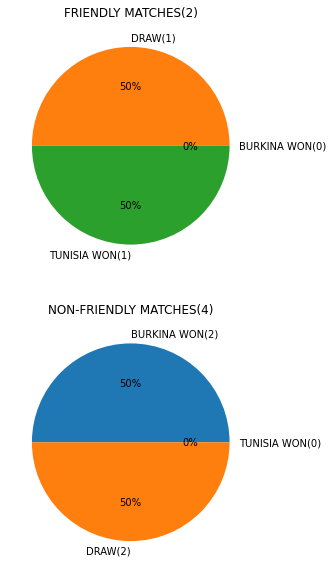

In [11]:
labels1 = ['BURKINA WON(0)', 'DRAW(1)', 'TUNISIA WON(1)']
sizes1 = get_results(friendly, 'Burkina Faso', 'Tunisia')

labels2 = ['BURKINA WON(2)', 'DRAW(2)', 'TUNISIA WON(0)']
sizes2 = get_results(not_friendly, 'Burkina Faso', 'Tunisia')

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ax1.pie(sizes1, labels=labels1, autopct='%.0f%%')
ax2.pie(sizes2, labels=labels2, autopct='%.0f%%')



ax1.set_title('FRIENDLY MATCHES(2)')
ax2.set_title('NON-FRIENDLY MATCHES(4)')


#plt.show()
plt.savefig("burkina_tunisia1.png")

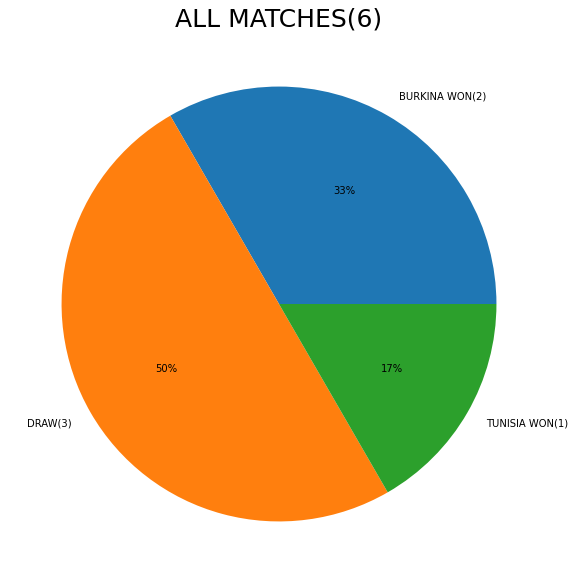

In [12]:
labels = ['BURKINA WON(2)', 'DRAW(3)', 'TUNISIA WON(1)']
sizes = get_results(burk_tun, 'Burkina Faso', 'Tunisia')

fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, labels=labels, autopct='%.0f%%')
ax1.set_title('ALL MATCHES(6)', fontsize=25)


#plt.show()
plt.savefig("burkina_tunisia2.png")